# {Concussion Protocol }📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

The problem I'm trying to address relates to the frequent concussions in professional football, which often times leads to CTE (Chronic Traumatic Encephalopathy) after the playing career. This has a large impact on the brains ability to process and respond to information, as well as many other negatives effects that inhibit ones ability to continue living their life. I'd like to look into current trends in professional football (NCAA/NFL) regarding concussion protocol and see how things have shifted in recent years as technology has advanced. In theory, you'd assume the amount of concussions would be reduced due to the new technology within the helmets to help with traumatic blows to the head area, but it seems as though the number of concussions has stayed relatively the same throughout everything. I'd like to research this more.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

The questions I'm trying to answer would be: 
- Are there a certain amount of career concussions that we can point to as a threshold for CTE? If so, what is that number? 
- How much time do players in concussion protocol typically miss? Does this differ by age or position?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

An answer may look like: 
- At 6 concussions and beyond in an athletes playing career, they are statistically likely to be diagnosed with CTE.
- At 4 career concussions, the likelihood of being diagnosed with CTE jumps significantly.
- In the NFL, players at skill positions (QB, WR, RB, DB) typically miss more time while being in concussion protocol.
- Players between ages 21-25 spend significantly less time in concussion protocol in comparison to players aged 26-30.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

Data Source 1: https://www.prosportstransactions.com/football/Search/Search.php
- NFL injury database, allowing people to view all injury designations throughout past NFL seasons.

Data Source 2: https://www.nfl.com/injuries/
- Similar to the first data source but is updated with the current season, which could be beneficial to see if any trends have shifted or started this year that differ from previous years.

Data Source 3: https://www.kaggle.com/code/mpwolke/nfl-concussions/notebook
- NFL concussion data beyond simply the injury designation. Showcases # of weeks in concussion list among many other things.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

 My initial approach will be to filter the number of days between the announcement of a player in concussion protocol and the day they get cleared from protocol, so I can get a better grasp on how long a typical concussion sidelines a player. From there, it's diving into the data based on several different factors: age, position, teams W-L at time of injury, etc. to see what plays into the length of a concussion protocol stay. I'd also like to look at the yearly concussion data, to see if theres been any trends with the technological advances in the sport (helmet padding, rule changes to protect helmet-to-helmet collisions, guardian cap introduction) in recent years.

CHECKPOINT 2

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis
Data Visualization
You should use several visualizations to help answer the questions above.

You should have at least 4 visualizations in your notebook, to represent different aspects and valuable insights of your data.
You can use 2 visualization library that you want.
You can use any type of visualization that best represents your data.
You'll need to provide a short description of each visualization and explain what it represents, and what insights you can extract from it.

VISUALIZATION 1

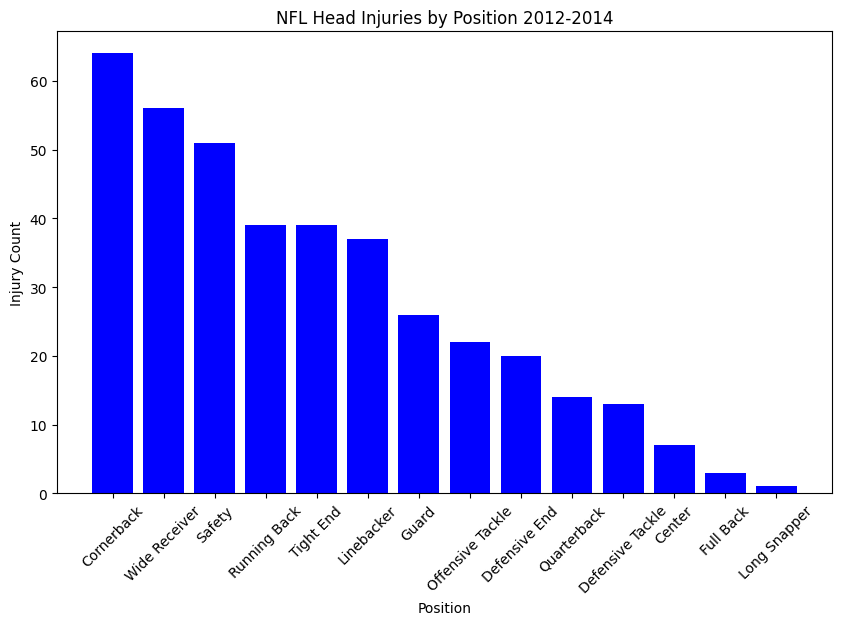

In [31]:
file_path = '/Users/matt/Documents/GitHub/final-project-jenkinsmt/Concussion Injuries 2012-2014.csv' 
df = pd.read_csv(file_path)

# Replace typo in dataset in 'Position' column from 'Comerback' to 'Cornerback'
df['Position'] = df['Position'].replace('Comerback', 'Cornerback')

position_tally = df['Position'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(position_tally.index, position_tally.values, color='blue')
plt.xlabel('Position')
plt.ylabel('Injury Count')
plt.title('NFL Head Injuries by Position 2012-2014')
plt.xticks(rotation=45)  
plt.show()



The above data visualization is a bar graph that counts the number of head injuries by position in the NFL from 2012 to 2014. This shows that the skill positions (wide receiver, running back, tight end) and secondary positions (cornerback, safety) are the groups that suffer from head injuries most often. The cornerback number being higher than the wide reciever number is interesting, as I thought those would be swapped due to the offensive vs defensive nature of the positions. 

VISUALIZATION 2

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL with the specified date range for scraping
url = "https://www.prosportstransactions.com/football/Search/SearchResults.php?Player=&Team=&BeginDate=2024-09-01&EndDate=2024-10-28&ILChkBx=yes&InjuriesChkBx=yes&submit=Search"

# Send a GET request to fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table on the page
table = soup.find("table", {"class": "datatable"})
if table is None:
    raise ValueError("No table found on the page. Check if the table's class has changed or if there are results.")

# Extract headers and rows, handling cases where headers might be missing
headers = [header.text.strip() for header in table.find_all("th")]
data = []

# If headers are empty, assign a default header list for a known column count (like 5 columns here)
if not headers:
    headers = ["Date", "Team", "Acquired", "Relinquished", "Notes"]  # Adjust based on expected columns

# Extract data for each row
for row in table.find_all("tr")[1:]:  # Skip the header row
    cells = row.find_all("td")
    if cells:  # Avoid empty rows
        data.append([cell.text.strip() for cell in cells])

# Check if data exists before creating the DataFrame
if not data:
    raise ValueError("No data found in the table. Verify if the date range or parameters need adjusting.")

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Display the scraped data
print(df)



          Date        Team Acquired        Relinquished  \
0   2024-09-02       49ers             • Ricky Pearsall   
1   2024-09-04    Steelers               • Boston Scott   
2   2024-09-04    Panthers            • Messiah Swinson   
3   2024-09-05  Buccaneers           • Earnest Brown IV   
4   2024-09-05      Chiefs             • Marquise Brown   
5   2024-09-05      Eagles                • Devin White   
6   2024-09-05      Eagles             • Isaiah Rodgers   
7   2024-09-05        Rams           • Darious Williams   
8   2024-09-05      Ravens               • Kyle Van Noy   
9   2024-09-05      Ravens                • Rasheen Ali   
10  2024-09-06      Texans             • Cameron Erving   
11  2024-09-07    Chargers                 • D.J. Chark   
12  2024-09-07  Commanders             • Marcus Mariota   
13  2024-09-07     Jaguars           • Brian Thomas Jr.   
14  2024-09-07        Jets             • Wes Schweitzer   
15  2024-09-07     Raiders             • Malcolm Koonce 

In [6]:
# Filter rows where 'Notes' column contains the word 'concussion' (case-insensitive)
concussion_df = df[df['Notes'].str.contains("concussion", case=False, na=False)]

# Display the filtered DataFrame
print(concussion_df)


         Date    Team Acquired    Relinquished                         Notes
8  2024-09-05  Ravens           • Kyle Van Noy  concussion, eye injury (out)


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

The three datasets listed above in the 'Data Sources' section are the only resources/references I've used thus far.

In [2]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 3513 bytes to source.py
